In [1]:
from SocialNetwork.social_network_environment import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
#from SocialNetwork.cascade import *
from Advertising.learners.greedyLearner import *
from Advertising.learners.UCB import *
seed = 2345 
random.seed(seed)
deltas=[0.5,0.42,0.38,0.30,0.2,0.05]
social_network = social_network_environment()
social_network.init_from_json(json_path_network='Config/network.json', json_path_features='Config/features.json')
adversary_bids = []
for _ in range(0, 10): 
    adversary_i_bids = []
    for _ in range(0, 5):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)
#print(evaluate(n_bids=5, n_adversaries=10, social_network=social_network, rounds=5000))
array_estimation = compute_array_estimated_influence(social_network, 5000)
for i in range(0, 1):
    best_arm = []
    print("This is UCB number " + str(i))
    best_arm, expected_values, number_of_pulls, index, bounds = ucb(arms_creation(number_of_arms=20, seed=seed), 100000, adversary_bids, array_estimation, social_network, deltas, 1)
    print(best_arm)


This is UCB number 0
Round number 10000
Round number 20000
Round number 30000
Round number 40000
Round number 50000
Round number 60000
Round number 70000
Round number 80000
Round number 90000
[4, 3, 4, 1, 0]


[-18.44952381 -12.91701793 -13.10701777 -17.73952381 -14.40042857
 -14.71940476 -12.8148481  -17.04       -14.18791209 -13.04894527
 -12.85536309 -20.59       -12.84566945 -13.80224762 -12.80691082
 -13.76262585 -12.79313651 -12.8682437  -19.49880952 -13.36123288]
[1, 1174, 217, 1, 10, 8, 15033, 2, 13, 335, 3806, 1, 4705, 25, 23108, 35, 48811, 2659, 2, 73]
16


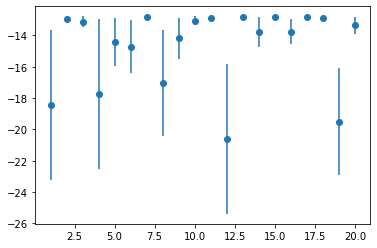

In [2]:
array = [i+1 for i in range(0, 20)]
print(expected_values)
print(number_of_pulls)
print(index)

plt.figure(0)
plt.errorbar(array, expected_values, yerr=bounds, fmt='o')

plt.show() 